In [3]:

import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')




In [4]:
df = pd.read_csv("census.csv")
df.head()

,Unnamed: 0,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income
0,0,"Aberdeen, SD Micro Area",40612,49652,42608,54533
1,1,"Aberdeen, WA Micro Area",72272,42440,71454,45483
2,2,"Abilene, TX Metro Area",165083,44007,169000,48156
3,3,"Ada, OK Micro Area",37438,40680,38289,46689
4,4,"Adjuntas, PR Micro Area",19458,13095,18525,11680


In [5]:
df["Pop Growth"] = df['2017 Pop'] - df['2012 Pop']
df["Income Growth"] = df['2017 Household Income'] - df['2012 Household Income']
df.head()

,Unnamed: 0,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth
0,0,"Aberdeen, SD Micro Area",40612,49652,42608,54533,1996,4881
1,1,"Aberdeen, WA Micro Area",72272,42440,71454,45483,-818,3043
2,2,"Abilene, TX Metro Area",165083,44007,169000,48156,3917,4149
3,3,"Ada, OK Micro Area",37438,40680,38289,46689,851,6009
4,4,"Adjuntas, PR Micro Area",19458,13095,18525,11680,-933,-1415


In [6]:
df["Pop Growth %"] = (df['Pop Growth']/df['2017 Pop'])*100
df["Income Growth %"] = (df['Income Growth']/df['2012 Household Income'])*100
df.style.format({"Pop Growth %":"{:,.2f}",
                "Income Growth %": "{:,.2f}"})


,Unnamed: 0,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %
0,0,"Aberdeen, SD Micro Area",40612,49652,42608,54533,1996,4881,4.68,9.83
1,1,"Aberdeen, WA Micro Area",72272,42440,71454,45483,-818,3043,-1.14,7.17
2,2,"Abilene, TX Metro Area",165083,44007,169000,48156,3917,4149,2.32,9.43
3,3,"Ada, OK Micro Area",37438,40680,38289,46689,851,6009,2.22,14.77
4,4,"Adjuntas, PR Micro Area",19458,13095,18525,11680,-933,-1415,-5.04,-10.81
5,5,"Adrian, MI Micro Area",99878,48528,98585,51339,-1293,2811,-1.31,5.79
6,6,"Akron, OH Metro Area",702966,49936,703398,53418,432,3482,0.06,6.97
7,7,"Alamogordo, NM Micro Area",64176,39054,65130,43533,954,4479,1.46,11.47
8,8,"Albany, GA Metro Area",157634,36216,153776,40612,-3858,4396,-2.51,12.14
9,9,"Albany-Schenectady-Troy, NY Metro Area",870890,60841,881862,65743,10972,4902,1.24,8.06


In [7]:
New_df = df.loc[(df['2017 Pop']>=200000)].drop(['Unnamed: 0'], axis  =1 )
New_df.head()

,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %
6,"Akron, OH Metro Area",702966,49936,703398,53418,432,3482,0.061416,6.972925
9,"Albany-Schenectady-Troy, NY Metro Area",870890,60841,881862,65743,10972,4902,1.244186,8.057067
13,"Albuquerque, NM Metro Area",885683,48990,905049,50781,19366,1791,2.139774,3.655848
18,"Allentown-Bethlehem-Easton, PA-NJ Metro Area",821273,58111,832790,62479,11517,4368,1.382942,7.516649
23,"Amarillo, TX Metro Area",250224,47866,261827,53665,11603,5799,4.431552,12.115071


In [8]:

New_df.to_csv("Census_N.csv")


In [10]:
#Rank Cities by Population and Income Growth, add up their score, sort, re-index

New_df["Population Rank"] = New_df["Pop Growth %"].rank() 
New_df["Income Rank"] = New_df["Income Growth %"].rank() 
New_df["Combined Growth"] = New_df["Pop Growth %"] + New_df["Income Growth %"]

New_df.sort_values(["Combined Growth"], ascending=[False], inplace = True)
New_df.reset_index(drop=True,inplace=True)

New_df['Metro Area'].replace('Metro Area','',regex=True,inplace=True)
New_df.head()

,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %,Population Rank,Income Rank,Combined Growth
0,"Lafayette, LA",273945,48185,487633,49514,213688,1329,43.821480,2.758120,166.0,9.0,46.579600
1,"Grand Rapids-Wyoming, MI",777159,50491,1039182,58094,262023,7603,25.214351,15.058129,163.0,161.0,40.272480
2,"Crestview-Fort Walton Beach-Destin, FL",183400,54118,261048,57421,77648,3303,29.744721,6.103330,165.0,45.0,35.848051
3,"Huntington-Ashland, WV-KY-OH",287234,38797,360603,44315,73369,5518,20.346198,14.222749,160.0,158.0,34.568947
4,"Winston-Salem, NC",478029,45356,658195,47099,180166,1743,27.372739,3.842931,164.0,16.0,31.215671


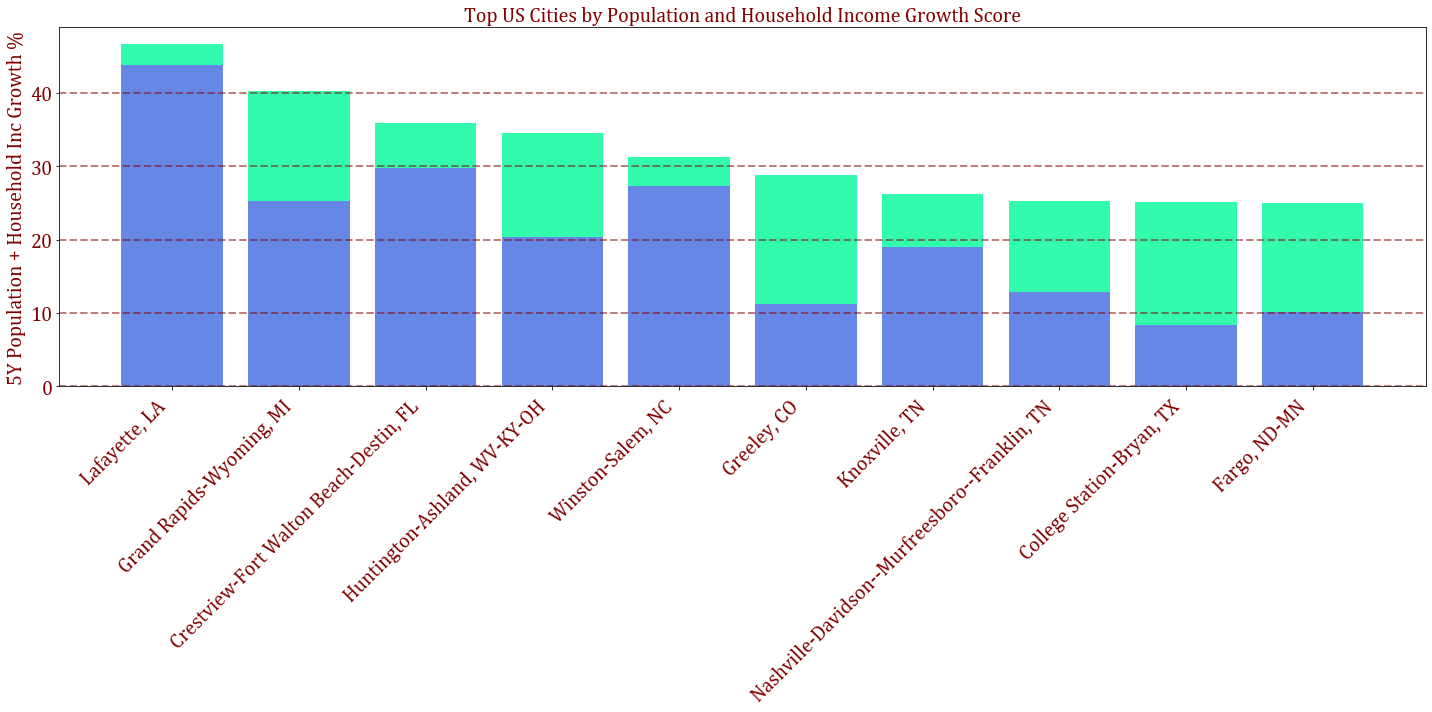

In [21]:
plt.figure(figsize=(20,10))

N = 10


popRank = New_df.iloc[0:10,7]
incRank = New_df.iloc[0:10,8]


ind = np.arange(N)


p1 = plt.bar(ind, popRank,color='royalblue', alpha=0.8, align = "center" )
p2 = plt.bar(ind, incRank, bottom=popRank, color='mediumspringgreen', alpha=0.8, align = "center")

plt.ylabel('5Y Population + Household Inc Growth %', color = "maroon", fontname="Cambria", fontsize=20)
plt.title('Top US Cities by Population and Household Income Growth Score', color = "maroon", fontname="Cambria", fontsize=20)
plt.yticks(color = "maroon", fontname="Cambria", fontsize=20)
plt.xticks(ind, New_df.iloc[0:10,0], rotation = 45, color = "maroon", fontname="Cambria", fontsize=20, ha="right")
plt.grid(which='major', axis='y', color = "maroon", linestyle='--', linewidth=2, alpha = 0.5)

plt.tight_layout()
plt.savefig("Output/Inc_Pop.png")
plt.show()


In [24]:
New_df.sort_values(["Pop Growth %"], ascending=[False], inplace = True)
New_df.head()



,Metro Area,2012 Pop,2012 Household Income,2017 Pop,2017 Household Income,Pop Growth,Income Growth,Pop Growth %,Income Growth %,Population Rank,Income Rank,Combined Growth
0,"Lafayette, LA",273945,48185,487633,49514,213688,1329,43.821480,2.758120,166.0,9.0,46.579600
2,"Crestview-Fort Walton Beach-Destin, FL",183400,54118,261048,57421,77648,3303,29.744721,6.103330,165.0,45.0,35.848051
4,"Winston-Salem, NC",478029,45356,658195,47099,180166,1743,27.372739,3.842931,164.0,16.0,31.215671
1,"Grand Rapids-Wyoming, MI",777159,50491,1039182,58094,262023,7603,25.214351,15.058129,163.0,161.0,40.272480
19,"Ponce, PR",242280,17225,316625,16736,74345,-489,23.480458,-2.838897,162.0,1.0,20.641561


In [31]:
# Set x axis and tick locations
x_axis = np.arange(10)
tick_locations = [value+0.4 for value in x_axis]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

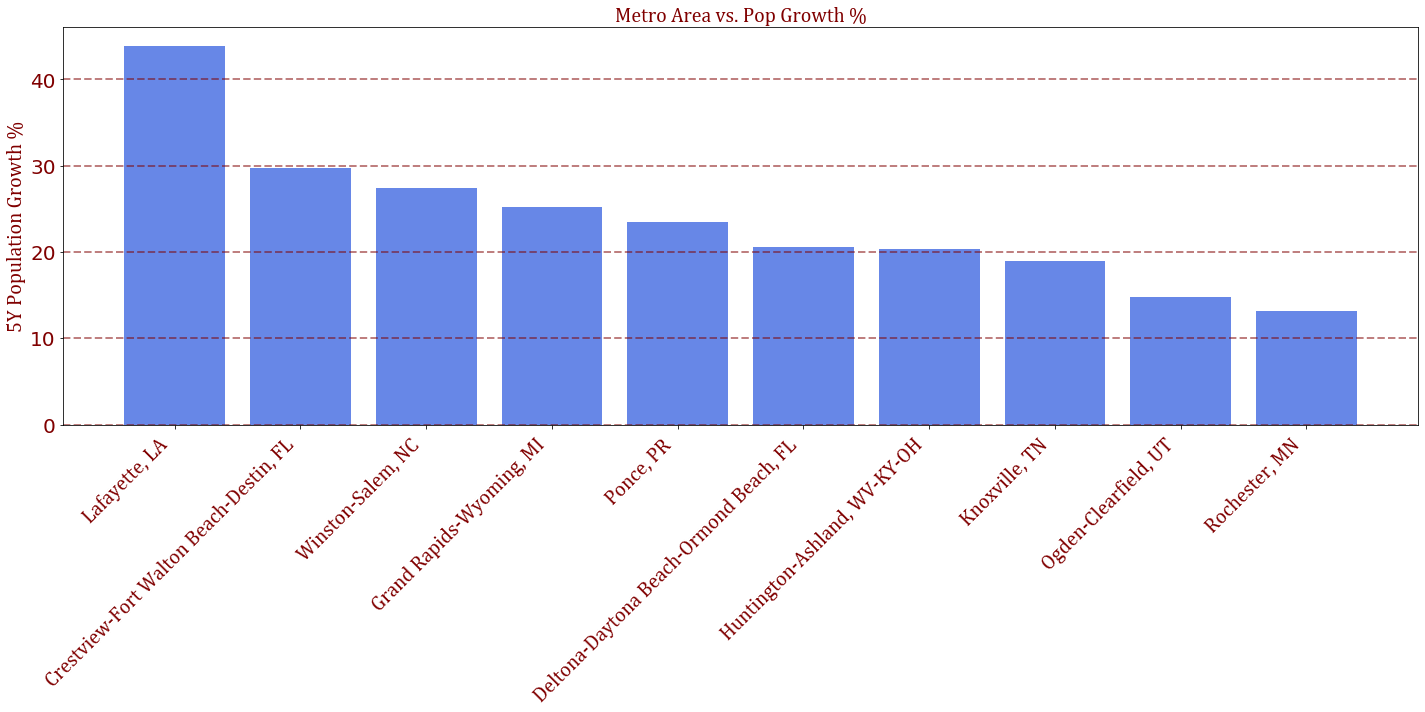

In [32]:
popRank = New_df.iloc[0:10,7]
Metro = New_df.iloc[0:10,0]


# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.bar(x_axis, popRank, color='royalblue', alpha=0.8, align = "edge")
plt.xticks(tick_locations, Metro, color = "maroon", rotation=45,fontname="Cambria", fontsize = 20, ha = "right")

# plt.xlabel("Metro Area", fontsize = 20)
plt.ylabel("5Y Population Growth %",color = "maroon", fontname="Cambria", fontsize=20)
plt.yticks(color = "maroon", fontsize=20)
plt.grid(which='major', axis='y', color = "maroon", linestyle='--', linewidth=2, alpha = 0.5)
plt.title("Metro Area vs. Pop Growth %",color = "maroon",fontname="Cambria", fontsize=20)
plt.tight_layout()
plt.savefig("Output/Pop_df{}.png")